In [490]:
import pandas as pd


df=pd.read_csv("D:\\Project\\House_price_prediction\\data\\bengaluru_house_prices.csv")

In [491]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [492]:
df.shape

(13320, 9)

In [493]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [494]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [495]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [496]:
df.duplicated().sum()
df_cleaned = df.drop_duplicates()
df_cleaned=df_cleaned.drop(columns=['society','availability','area_type'])

print("Original rows:", len(df))
print("After dropping duplicates:", len(df_cleaned))

df_cleaned.isnull().sum()


Original rows: 13320
After dropping duplicates: 12791


location        1
size           16
total_sqft      0
bath           73
balcony       605
price           0
dtype: int64

In [497]:
df_cleaned.nunique()

location      1305
size            31
total_sqft    2117
bath            19
balcony          4
price         1994
dtype: int64

In [498]:
df_cleaned.corr(numeric_only=True)


,bath,balcony,price
bath,1.000000,0.200387,0.453099
balcony,0.200387,1.000000,0.118645
price,0.453099,0.118645,1.000000


In [499]:
df_cleaned.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

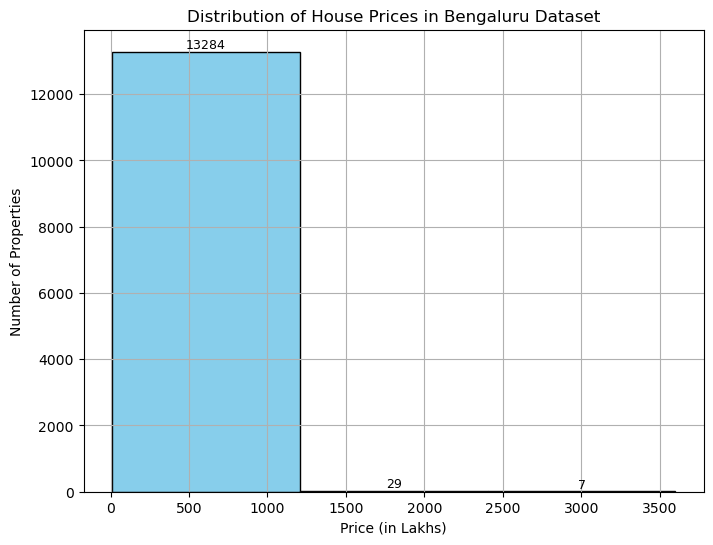

In [500]:
import matplotlib.pyplot as plt
import numpy as np

# Compute histogram manually to get bin edges and counts
counts, bin_edges = np.histogram(df['price'], bins=3)

plt.figure(figsize=(8,6))
plt.hist(df['price'], bins=bin_edges, edgecolor='black', color='skyblue')

plt.title("Distribution of House Prices in Bengaluru Dataset")
plt.xlabel("Price (in Lakhs)")
plt.ylabel("Number of Properties")
plt.grid(True)

# Annotate each bin with its count
for i in range(len(counts)):
    bin_center = (bin_edges[i] + bin_edges[i+1]) / 2
    plt.text(bin_center, counts[i], str(counts[i]), ha='center', va='bottom', fontsize=9, color='black')

plt.show()


In [501]:
from sklearn.impute import SimpleImputer
import numpy as np
numeric_cols = df_cleaned.select_dtypes(include='number').columns
categorical_cols = df_cleaned.select_dtypes(exclude='number').columns
num_imputer=SimpleImputer(strategy='median')
df_cleaned[numeric_cols]=num_imputer.fit_transform(df_cleaned[numeric_cols])

#most frequesnt for categorical
cat_imputer=SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_cols]=cat_imputer.fit_transform(df_cleaned[categorical_cols])

In [502]:
#df_cleaned
df_cleaned.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [503]:
df_cleaned.to_csv("cleaned_dataset.csv", index=False)


PermissionError: [Errno 13] Permission denied: 'cleaned_dataset.csv'

In [ ]:
num_imputer.statistics_
cat_imputer.statistics_

array(['Whitefield', '2 BHK', '1200'], dtype=object)

In [ ]:
df_cleaned.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df_cleaned['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df_cleaned["bhk"]=df_cleaned['size'].apply(lambda x:int(x.split(" ")[0]))

In [ ]:
df_cleaned.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [ ]:
df_cleaned['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df_cleaned[df_cleaned.bhk>23]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [ ]:
df_cleaned.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [ ]:
df_cleaned[~df_cleaned['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [ ]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


In [ ]:
convert_sqft_to_num("2100 - 2850")

2475.0

In [ ]:
df4=df_cleaned.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3


In [ ]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
balcony           0.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [ ]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [ ]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136


In [ ]:
len(df4.location.unique())

1305

In [ ]:
df4.location.value_counts

<bound method IndexOpsMixin.value_counts of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
Name: location, Length: 12791, dtype: object>

In [ ]:
df4.location=df4.location.apply(lambda x:x.strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               525
Sarjapur  Road           379
Electronic City          289
Kanakpura Road           249
Thanisandra              232
                        ... 
ittamadu                   1
kadubisnahalli             1
kamanahalli main road      1
kanakapura main road       1
kanakapura road            1
Name: location, Length: 1294, dtype: int64

In [ ]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagadevanahalli          10
Nagappa Reddy Layout     10
Narayanapura             10
Marsur                   10
Naganathapura            10
                         ..
ittamadu                  1
kadubisnahalli            1
kamanahalli main road     1
kanakapura main road      1
kanakapura road           1
Name: location, Length: 1061, dtype: int64

In [ ]:
df4.to_csv("without_dataset.csv", index=False)


In [ ]:
df4.isnull().sum()


location           0
size               0
total_sqft        46
bath               0
balcony            0
price              0
bhk                0
price_per_sqft    46
dtype: int64

In [ ]:
df4.location=df4.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())


234

In [ ]:
df4.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [ ]:
df4[df4.total_sqft/df4.bhk<300].head()



,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [ ]:
df6=df4[~(df4.total_sqft/df4.bhk<300)]
df6

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136


In [ ]:
df6.price_per_sqft.describe()

count     12011.000000
mean       6363.396694
std        4226.681217
min         267.829813
25%        4250.000000
50%        5330.490405
75%        6967.569041
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
df6.isnull().sum()

location           0
size               0
total_sqft        46
bath               0
balcony            0
price              0
bhk                0
price_per_sqft    46
dtype: int64

In [ ]:
# Mean
mean_val = df6['price_per_sqft'].mean()

# Median
median_val = df6['price_per_sqft'].median()

# Mode (can be multiple values)
mode_val = df6['price_per_sqft'].mode()

print("Mean:", mean_val)
print("Median:", median_val)
print("Mode:", list(mode_val))


Mean: 6363.396694219977
Median: 5330.490405117271
Mode: [5000.0]


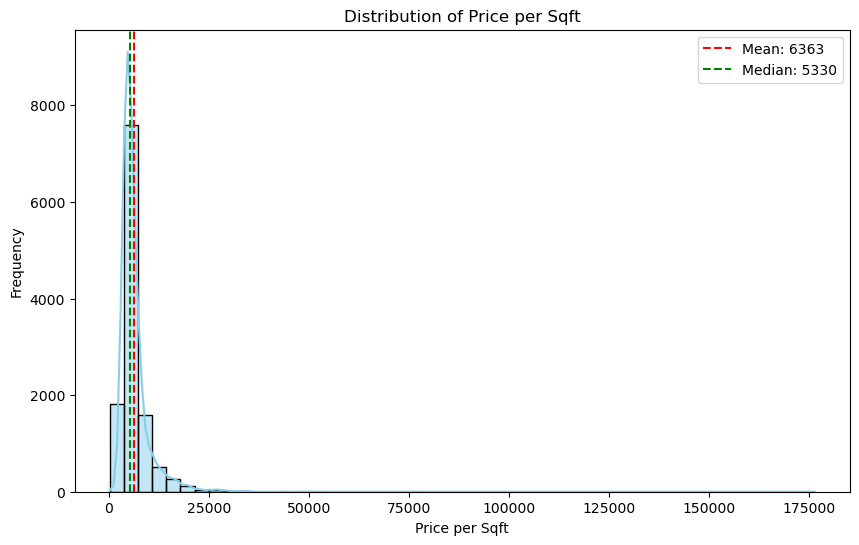

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df6['price_per_sqft'],bins=50,kde=True,color='skyblue')
mean_val=df6['price_per_sqft'].mean()
median_val = df6['price_per_sqft'].median()

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.0f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.0f}')

plt.title("Distribution of Price per Sqft")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [ ]:
df7=remove_pps_outlier(df6)
df7.shape

(9898, 8)

In [ ]:
import matplotlib


def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location ) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK' ,s=50)
    plt.xlabel("Toatal square feet area")
    plt.ylabel("price per square feet")
    plt.title(location)
    plt.legend()

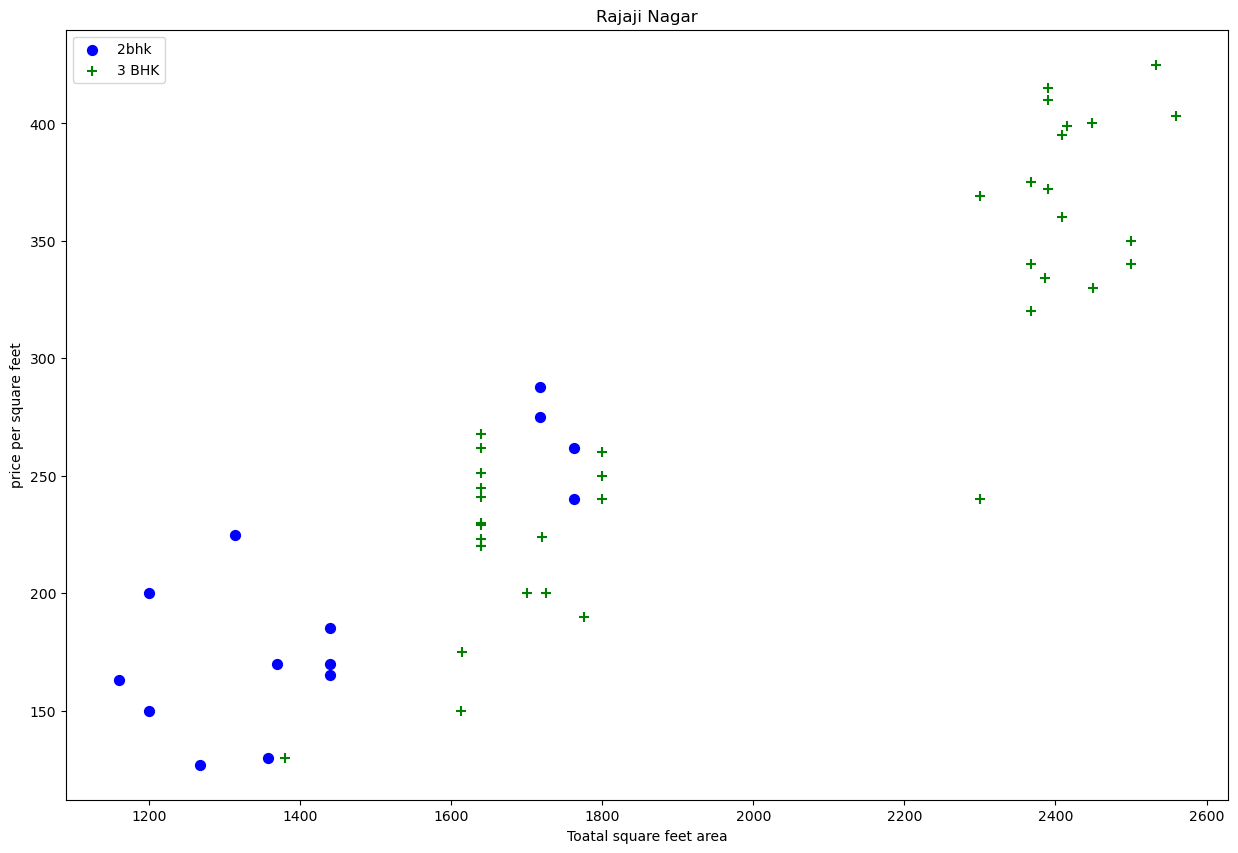

In [ ]:
plot_scatter_chart(df7,"Rajaji Nagar")

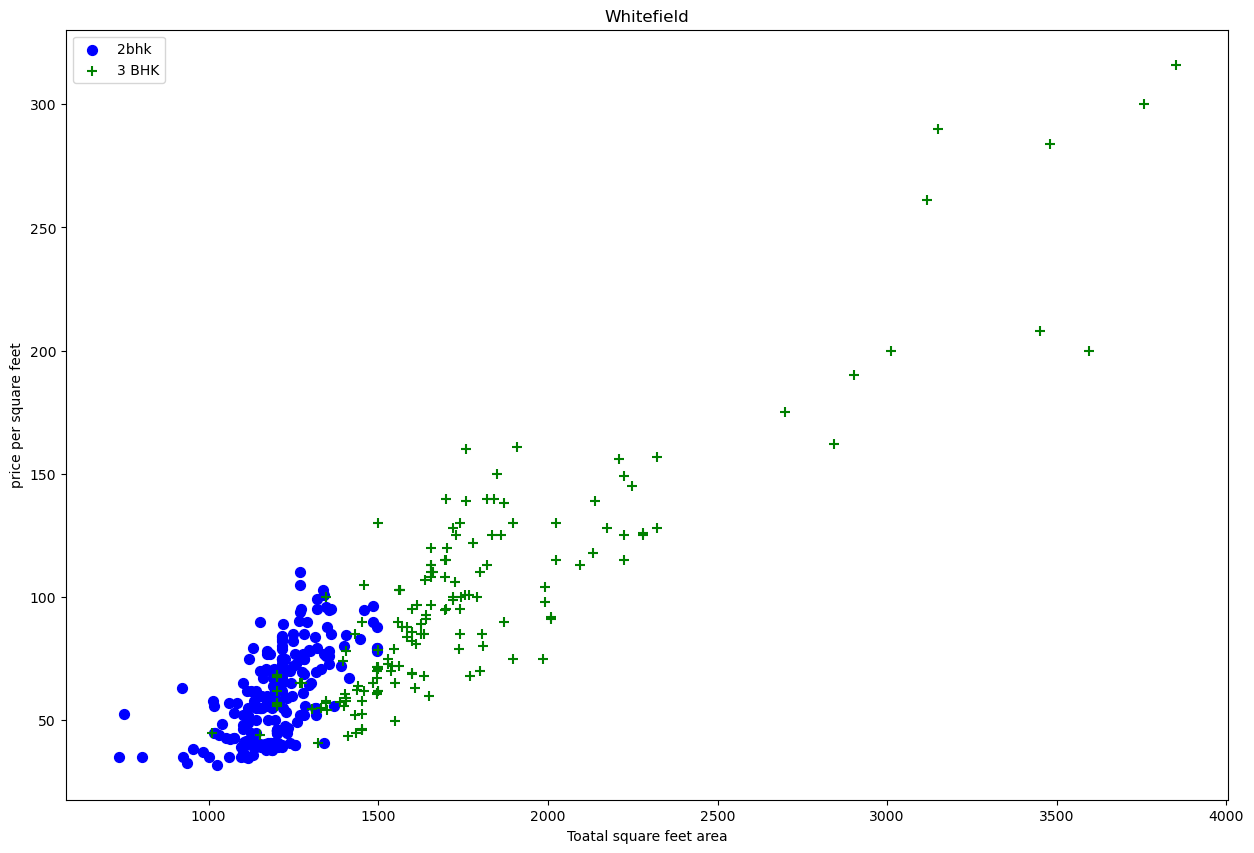

In [ ]:
plot_scatter_chart(df7,"Whitefield")


In [ ]:
import numpy as np
import pandas as pd

def remove_bhk_outliers_iqr(df):
    exclude_indices = np.array([])
    
    # Group by location and bhk
    for (location, bhk), group in df.groupby(['location', 'bhk']):
        if group.shape[0] > 5:  # only apply if enough data points
            Q1 = group['price_per_sqft'].quantile(0.25)
            Q3 = group['price_per_sqft'].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # mark outliers
            outliers = group[(group['price_per_sqft'] < lower_bound) | 
                             (group['price_per_sqft'] > upper_bound)]
            exclude_indices = np.append(exclude_indices, outliers.index.values)
    
    return df.drop(exclude_indices, axis='index')


In [ ]:
df8=remove_bhk_outliers_iqr(df7)
df8.shape

(9565, 8)

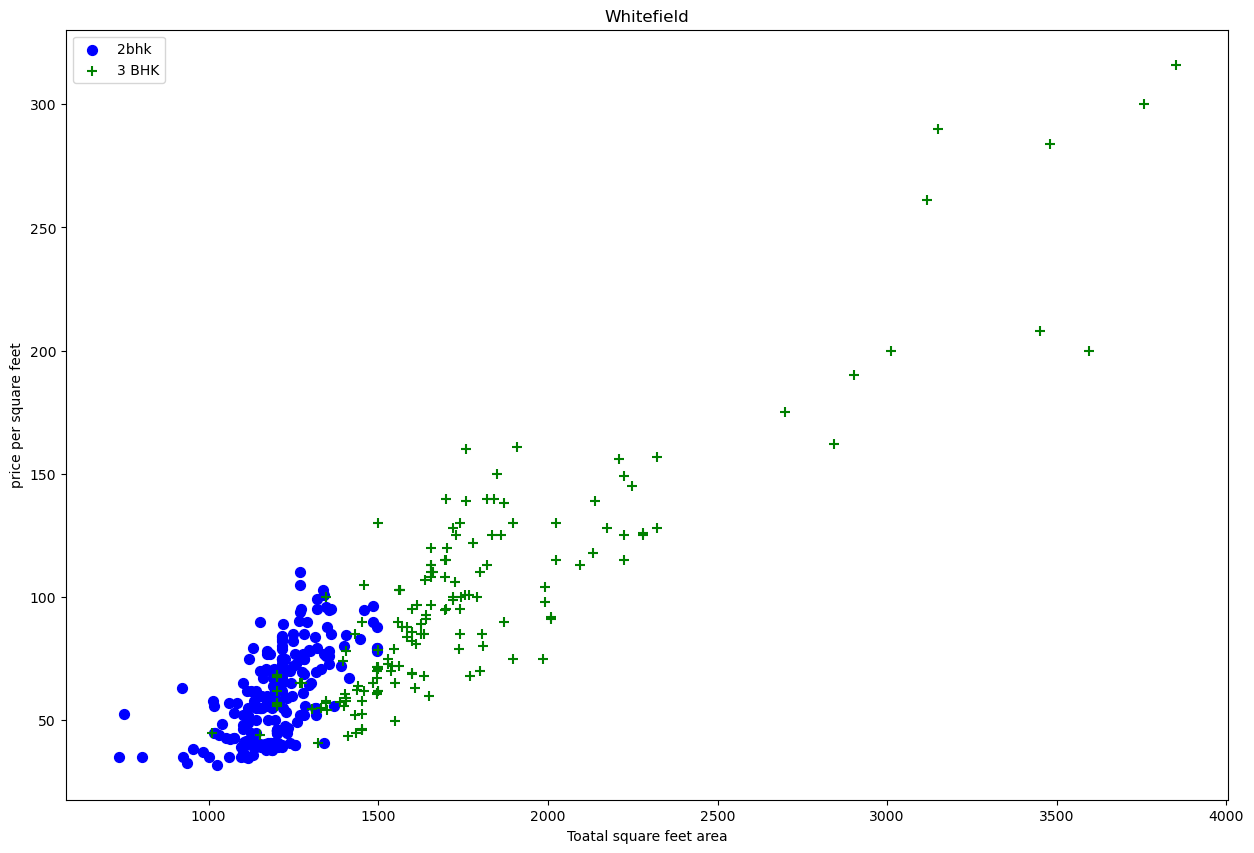

In [ ]:
plot_scatter_chart(df8,"Whitefield")


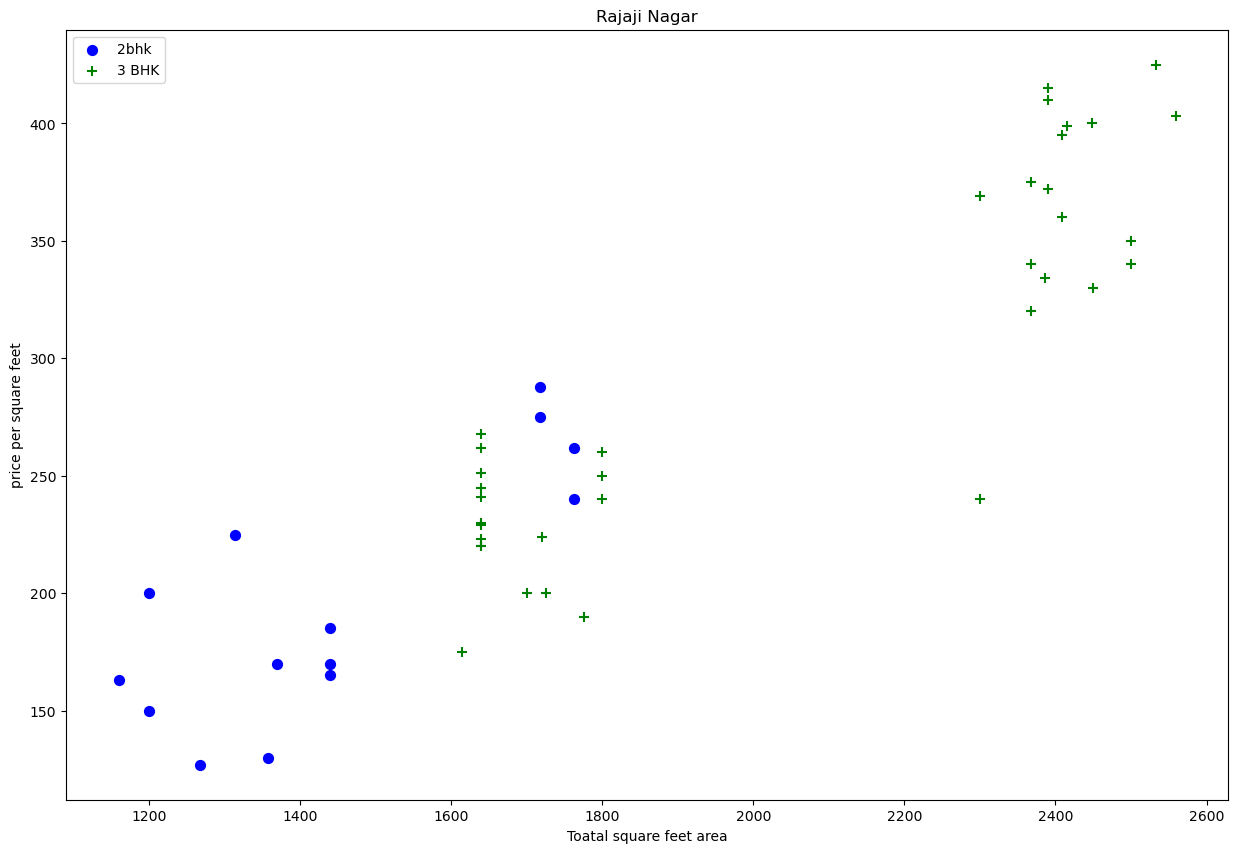

In [ ]:
plot_scatter_chart(df8,"Rajaji Nagar")

In [ ]:
print("Rows before:", df7.shape[0])
print("Rows after:", df8.shape[0])
print("Rows removed:", df7.shape[0] - df8.shape[0])


Rows before: 9898
Rows after: 9565
Rows removed: 333


Text(0, 0.5, 'Count')

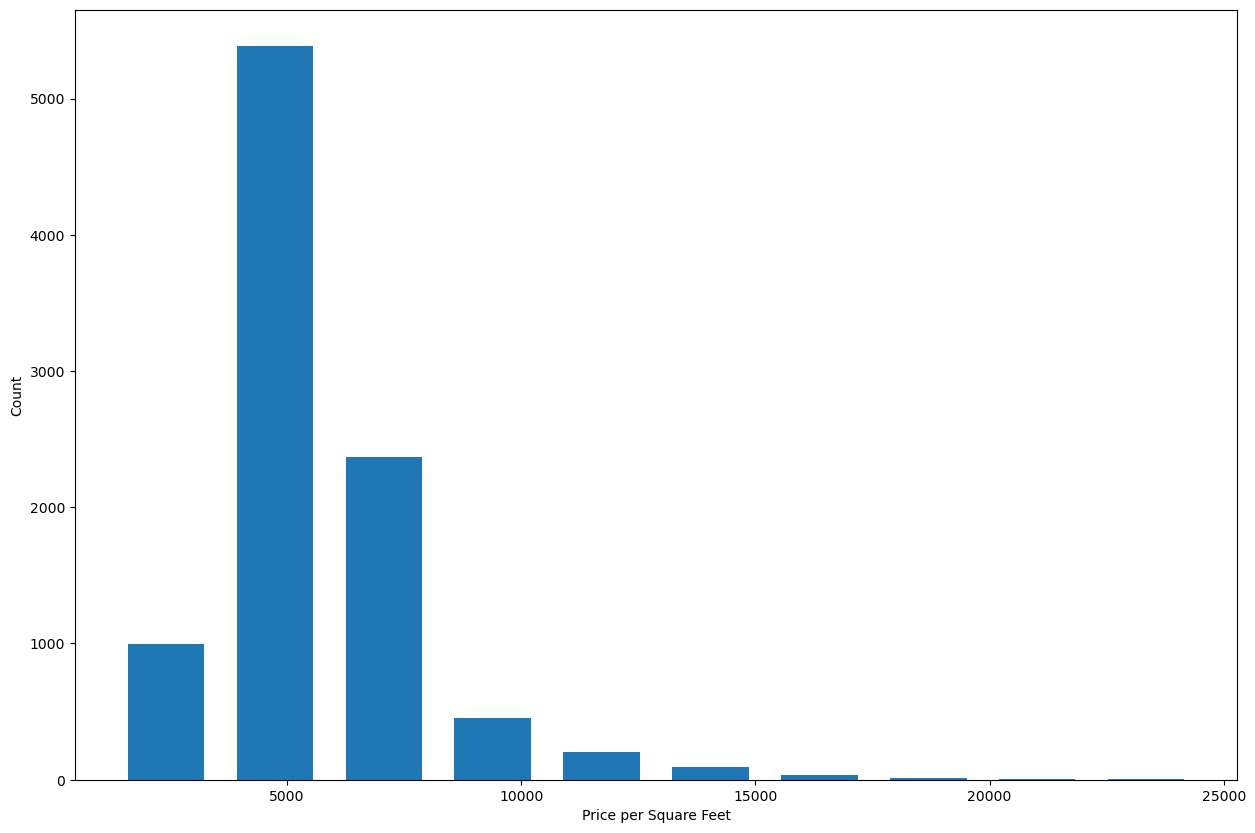

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,10)
plt.hist(df8.price_per_sqft,rwidth=0.7)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5038,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
8118,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8212,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
8956,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
9298,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

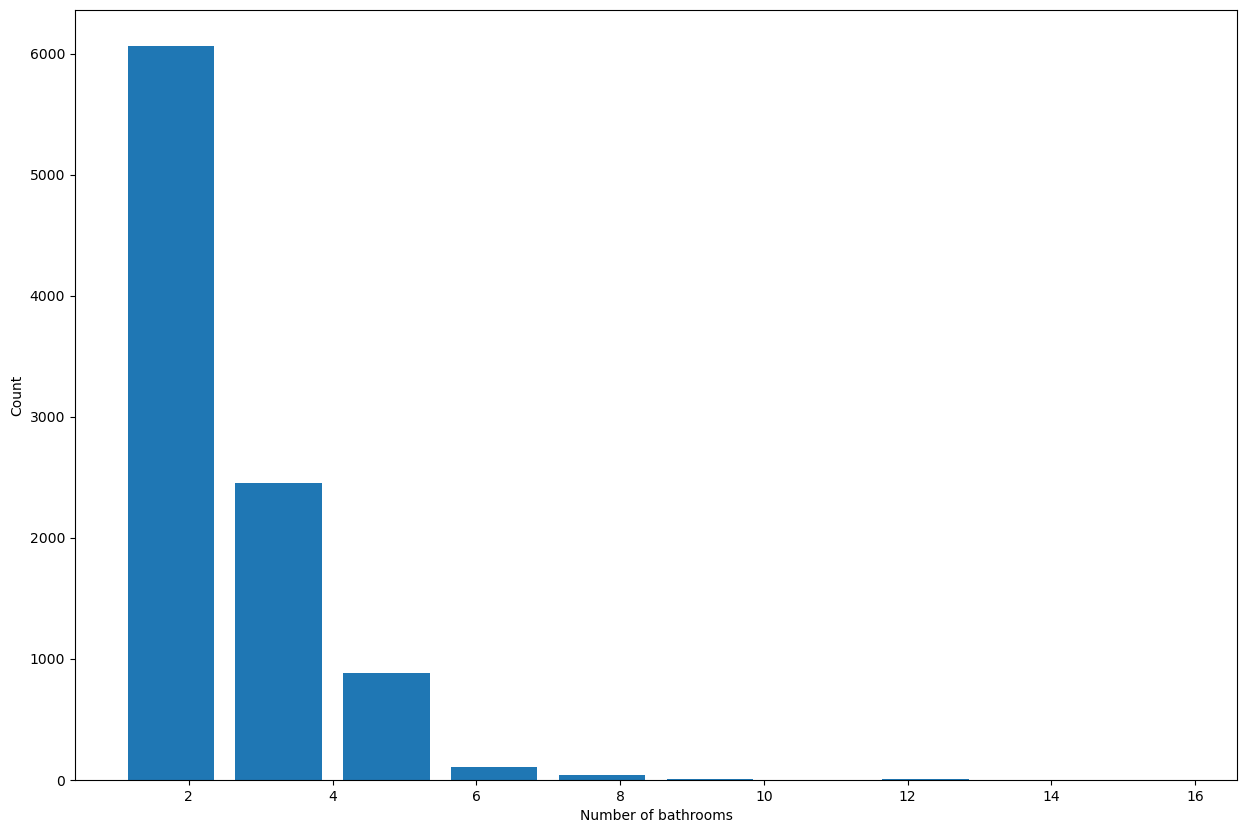

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel('Count')

In [ ]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1525,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5007,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6393,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8041,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [ ]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(9469, 8)

In [ ]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [ ]:
dummies=pd.get_dummies(df10['location']).astype(int)
dummies.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [506]:
dummies.dtypes

1st Block Jayanagar     int64
1st Phase JP Nagar      int64
2nd Stage Nagarbhavi    int64
5th Block Hbr Layout    int64
5th Phase JP Nagar      int64
                        ...  
Yelahanka               int64
Yelahanka New Town      int64
Yelenahalli             int64
Yeshwanthpur            int64
other                   int64
Length: 234, dtype: object

In [507]:
df11=pd.concat([df10,dummies.drop('other',axis=1)],axis='columns')

In [508]:
df11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [509]:
df12=df11.drop(['location'],axis=1)

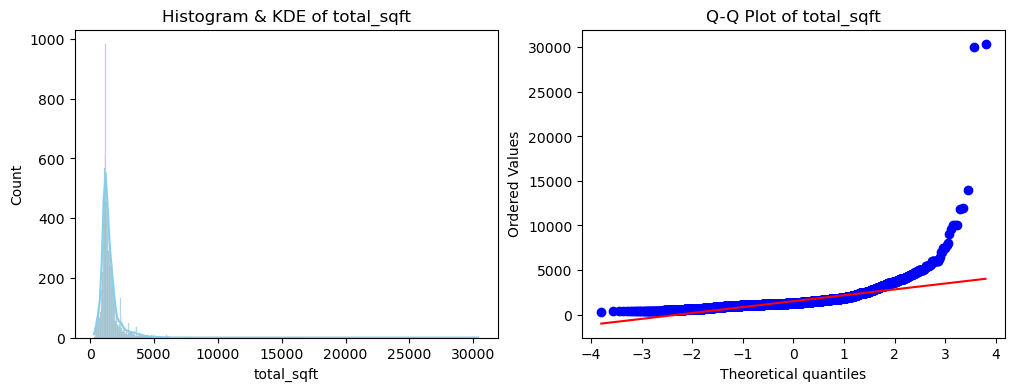

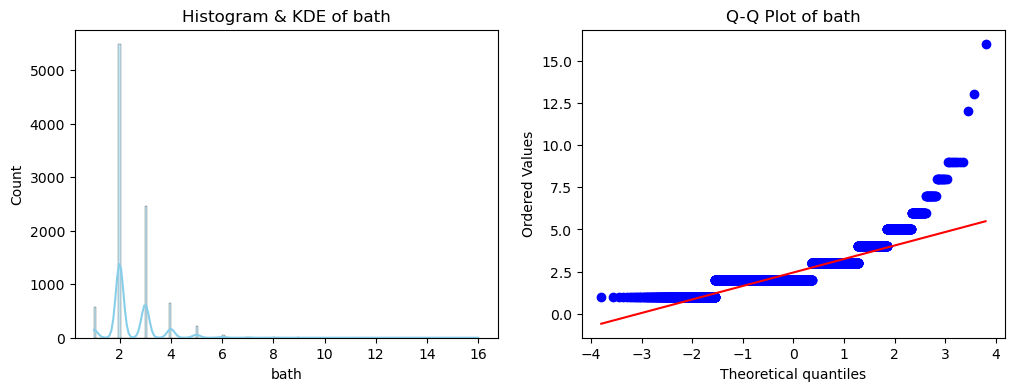

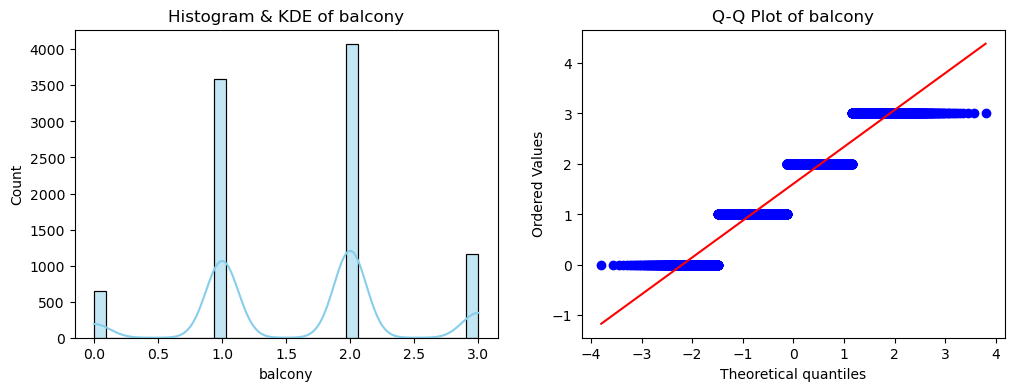

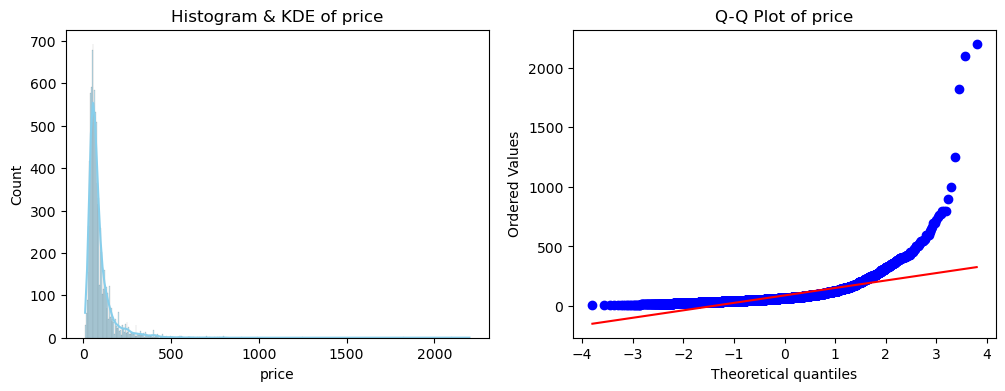

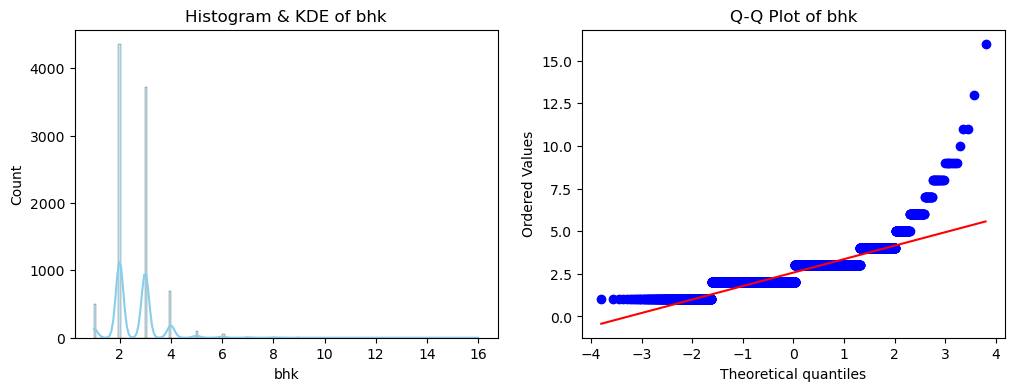

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

cols = ['total_sqft','bath','balcony','price','bhk']

for col in cols:
    plt.figure(figsize=(12,4))
    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df11[col], kde=True, color='skyblue')
    plt.title(f"Histogram & KDE of {col}")
    
    # Q-Q plot
    plt.subplot(1,2,2)
    stats.probplot(df11[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")
    
    plt.show()


In [510]:
df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [512]:
X=df12.drop('price',axis=1)
X

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,1256.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,812.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9895,1440.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9896,1075.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [513]:
y=df12.price
y

0       428.00
1       194.00
2       235.00
3       130.00
4       148.00
         ...  
9893     65.00
9894     26.00
9895     63.93
9896     48.00
9897    400.00
Name: price, Length: 9469, dtype: float64

In [516]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [517]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8528158264632585

In [527]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=2)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.86734191, 0.85095829, 0.84269393, 0.851105  , 0.77143577])

In [540]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Define CV strategy (same as before for fair comparison)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=2)

# Random Forest model
rf = RandomForestRegressor(
    n_estimators=100,       # number of trees
    max_depth=None,         # let trees grow fully
    random_state=2,
    n_jobs=-1               # use all cores for speed
)

# Cross-validation scores (R²)
scores = cross_val_score(rf, X, y, cv=cv, scoring='r2')
print("Random Forest R² scores:", scores)
print("Mean R²:", scores.mean())


Random Forest R² scores: [0.80872772 0.83793005 0.84390497 0.81319743 0.76640107]
Mean R²: 0.8140322491260725


In [548]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=237)

In [557]:
np.where(X.columns=='1st Block Jayanagar')[0][0]

np.int64(4)

In [556]:
loc_index = np.where(X.columns == '2nd Phase Judicial Layout')[0]
if loc_index.size > 0:
    print("Found at index:", loc_index[0])
else:
    print("Column not found in X.columns")


Column not found in X.columns


In [558]:
def predict_price(location, sqft, bath, bhk):
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if location in X.columns:
        loc_index = np.where(X.columns == location)[0][0]
        x[loc_index] = 1
    else:
        print(f"Location '{location}' not found, treating as 'other'")
        if 'other' in X.columns:
            other_index = np.where(X.columns == 'other')[0][0]
            x[other_index] = 1
    
    return lr_clf.predict([x])[0]


In [559]:
predict_price('1st Phase JP Nagar',1000, 2, 4)

c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(89.62220394015503)

In [568]:

predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(95.35631304820593)

In [562]:

predict_price('Electronic City Phase II',1056, 2, 2)

c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(39.95507972081768)

In [563]:

predict_price('Indira Nagar',1000, 2, 2)

c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(177.50974590617756)

In [564]:

predict_price('Indira Nagar',1000, 3, 3)

c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(181.4641142839637)

In [574]:

predict_price('Rajaji Nagar',1763, 3, 2)

c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(282.497264496105)

In [576]:

predict_price('Rajaji Nagar',1640, 3, 3)

c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(272.6374887208687)

In [577]:
import pickle
with open('banglore_home_prices_model','wb')as f:
    pickle.dump(lr_clf,f)

    

In [579]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]

}
with open('columns.json',"w") as f:
    f.write(json.dumps(columns))